In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model & preprocessing 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline

#pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)


train = pd.read_csv('./datasets/preprocess_train.csv')

### Is dataset suitable for modelling a linear regression?

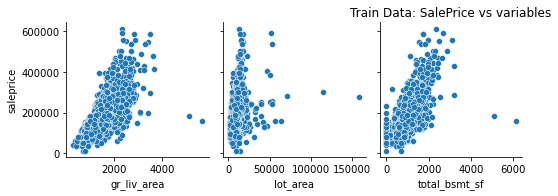

In [2]:
# Check if Data has a linear relationship with a independent variable
# Scatterplot of Sale Price vs Gr Liv Area

sns.pairplot(data=train, x_vars=['gr_liv_area','lot_area','total_bsmt_sf'], y_vars='saleprice')
plt.title('Train Data: SalePrice vs variables');

By looking at the plots, we can see that none of the selected independent variables form an accurate linear shape, but 'Gr Liv Area' & 'Total Bsmt SF' still do better. It shows that a linear model might not be the most efficient to explain the data's variability and biasness.

# Model benchmarks

Now that we have done a first round of selecting features and preprocessing our data, I would like to find a regression model that would best fit our training data set. There are 4 models I would be benchmarking to identify which would give the lowest bias & variance when fitted on the test data. To calculate this, we will compare the RMSE score. 

### Sequence to select model
* Use cross validation to pick model
* Choose the best algorithm
* Select the most predictive features
* Tune the hyperparameters

### Ordinary Least Square model (1 Feature)

Our goal for the model is to reduce the metric of RMSE (Root Mean Squared Error) to 0.
Hence, our baseline will be the RSME when we fit the data on the OLS regression model below.

y-intercept of OLS model (One Feature): 26801.659877020313
coefficent of OLS model (One Feature): [103.]
CV RMSE of OLS model (One Feature): 56568.0
Train RMSE of OLS model (One Feature):56210.0
Holdout RMSE of OLS model (One Feature):58465.0


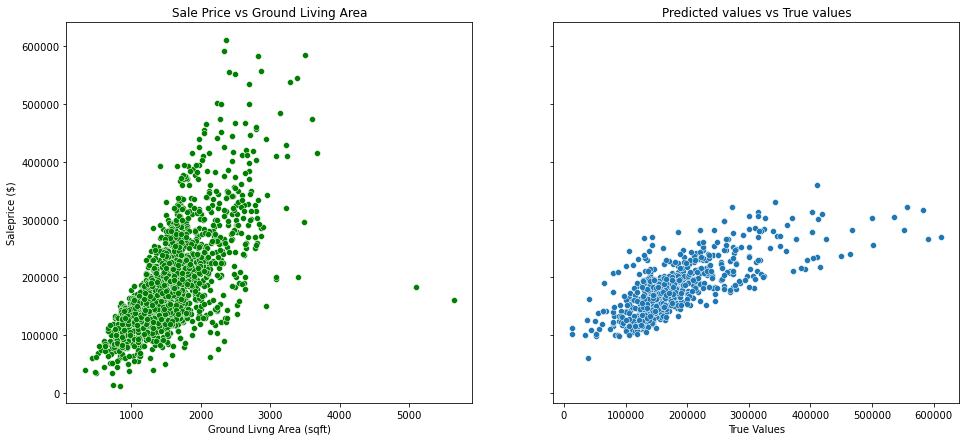

In [3]:
# data frame of our features
X = train[['gr_liv_area']]
y = train['saleprice']

# Split our data to train/test
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=40)

#Instantiate LinearRegression Model
lr = LinearRegression()

# Find the MSE & RMSE for Cross-Validation on baseline with 1 feature
mse_baseline_cv_1 = abs(cross_val_score(
        lr,
        X_train,
        y_train,
        scoring='neg_mean_squared_error',
        cv=3
).mean())




# Fit the Model
lr.fit(X_train, y_train)

# Observe the model coefficient and intercept
print(f'y-intercept of OLS model (One Feature): {lr.intercept_}')
print(f'coefficent of OLS model (One Feature): {np.round(lr.coef_)}')

# Make predictions
y_pred = lr.predict(X_holdout)

# Find the RMSE for baseline
rmse_baseline_cv_1 = (abs(mse_baseline_cv_1)**0.5)
rmse_baseline_train_1 = mean_squared_error(y_train, lr.predict(X_train)) ** 0.5
rmse_baseline_holdout_1 = mean_squared_error(y_holdout, y_pred) ** 0.5
print(f'CV RMSE of OLS model (One Feature): {np.round(rmse_baseline_cv_1,0)}')
print(f'Train RMSE of OLS model (One Feature):{np.round(rmse_baseline_train_1)}')
print(f'Holdout RMSE of OLS model (One Feature):{np.round(rmse_baseline_holdout_1)}')

# Create a figure for 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7), sharey=True)

# Scatterplot for 'saleprice' vs 'gr_liv_area'
sns.scatterplot(ax=ax1, x=train['gr_liv_area'], y=train['saleprice'], color='green')
ax1.set_title('Sale Price vs Ground Living Area')
ax1.set_xlabel('Ground Livng Area (sqft)')
ax1.set_ylabel('Saleprice ($)');
                   
sns.scatterplot(ax=ax2, x=y_holdout, y=y_pred)
ax2.set_title('Predicted values vs True values')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values');

Looking at the saleprice vs ground living area scatterplot, 

### Ordinary Least Square model (All Features)

y-intercept of baseline model: -358339.88867536536
CV RMSE of OLS model (All Features): 37304.0
Train RMSE of OLS model (All Features):24079.0
Holdout RMSE of OLS model (All Features):30629.0


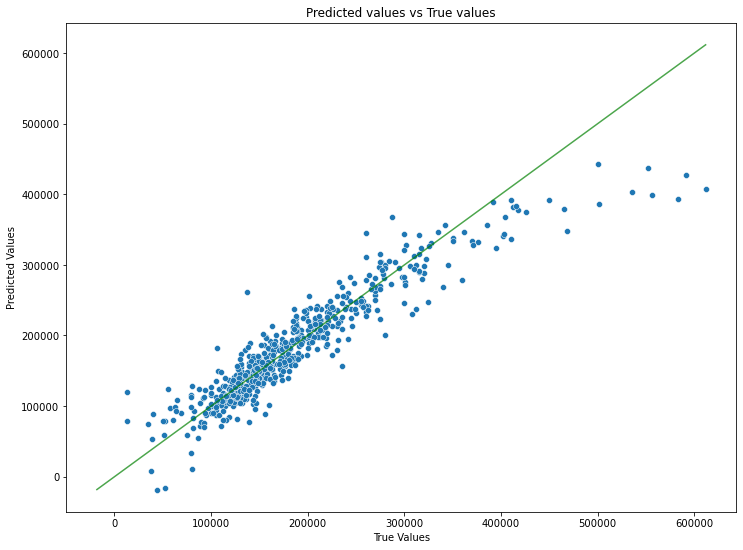

In [4]:
# data frame of our features
X = train.drop(columns='saleprice', axis=1)
y = train['saleprice']

# Instantiate Model
lr = LinearRegression()

# Split our data to train/test
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale our features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_holdout_sc = sc.transform(X_holdout)

# RMSE score of linear regression with all features

mse_baseline_cv_all = abs(cross_val_score(
        lr,
        X_train,
        y_train,
        scoring='neg_mean_squared_error',
        cv=3
).mean())


# Find the RMSE for Cross-Validation on baseline

# Fit the Model
lr.fit(X_train, y_train)

# Observe the model intercept
print(f'y-intercept of baseline model: {lr.intercept_}')

# Make predictions
y_pred = lr.predict(X_holdout)

# Find the RMSE for holdout on baseline
rmse_baseline_cv_all = (abs(mse_baseline_cv_all)**0.5)
rmse_baseline_train_all = mean_squared_error(y_train, lr.predict(X_train)) ** 0.5
rmse_baseline_holdout_all = mean_squared_error(y_holdout, y_pred) ** 0.5
print(f'CV RMSE of OLS model (All Features): {np.round(rmse_baseline_cv_all,0)}')
print(f'Train RMSE of OLS model (All Features):{np.round(rmse_baseline_train_all)}')
print(f'Holdout RMSE of OLS model (All Features):{np.round(rmse_baseline_holdout_all)}')

# See the relationship between the observed and predicted values
plt.figure(figsize = (12, 9))
sns.scatterplot(x=y_holdout, y=y_pred);
maxDist = max(max(y_pred), max(y_holdout)) 
minDist = min(min(y_pred), min(y_holdout)) 
sns.lineplot(x=(minDist, maxDist), y=(minDist, maxDist), color = 'green', alpha = 0.7) 
plt.title('Predicted values vs True values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

The RMSE is huge, and its performing far worse than the current baseline. This is probably due to overfitting and there are variables that are affecting the coefficients drastically. We will be able to deal with these variables when we use the lasso & elastic net model.

### What is the best fitting Ridge Regression model?


y-intercept of ridge model: 180428.0914166085
alpha of ridge model: 327.45491628777285
Train score of ridge model: 0.8800314195605514
Holdout score of ridge model: 0.8704408689144808
CV RMSE of ridge model: 31256.0
Train RMSE of ridge model:26526.0
Holdout RMSE of ridge model:30604.0


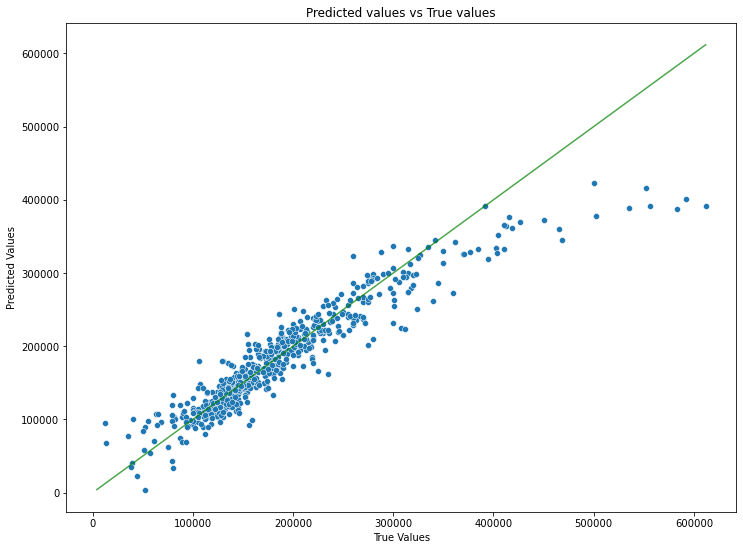

In [5]:
# data frame of our features
X = train.drop(columns='saleprice', axis=1)
y = train['saleprice']

# Split our data to train/test
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale our features
X_train_sc = sc.fit_transform(X_train)
X_holdout_sc = sc.transform(X_holdout)

# Set alphas range of values
r_alphas = np.logspace(0, 3, 100)

#Instantiate ridgeCV
ridge_cv = RidgeCV(
    alphas=r_alphas,
    cv=3)

mse_ridge_cv = cross_val_score(
    ridge_cv, 
    X_train_sc, 
    y_train, 
    scoring = 'neg_mean_squared_error',
    cv=3
).mean()


# Fit the Model
ridge_cv.fit(X_train_sc, y_train)

# Observe the model intercept
print(f'y-intercept of ridge model: {ridge_cv.intercept_}')
print(f'alpha of ridge model: {ridge_cv.alpha_}')


# Make predictions
y_pred = ridge_cv.predict(X_holdout_sc)
print(f'Train score of ridge model: {ridge_cv.score(X_train_sc, y_train)}')
print(f'Holdout score of ridge model: {ridge_cv.score(X_holdout_sc, y_holdout)}')

# Find the RMSE for baseline
rmse_ridge_cv = (abs(mse_ridge_cv)**0.5)
rmse_ridge_train = mean_squared_error(y_train, ridge_cv.predict(X_train_sc)) ** 0.5
rmse_ridge_holdout = mean_squared_error(y_holdout, y_pred) ** 0.5
print(f'CV RMSE of ridge model: {np.round(rmse_ridge_cv,0)}')
print(f'Train RMSE of ridge model:{np.round(rmse_ridge_train)}')
print(f'Holdout RMSE of ridge model:{np.round(rmse_ridge_holdout)}')

# See the relationship between the observed and predicted values
plt.figure(figsize = (12, 9))
sns.scatterplot(x=y_holdout, y=y_pred);
maxDist = max(max(y_pred), max(y_holdout)) 
minDist = min(min(y_pred), min(y_holdout)) 
sns.lineplot(x=(minDist, maxDist), y=(minDist, maxDist), color = 'green', alpha = 0.7) 
plt.title('Predicted values vs True values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

### What is the best fitting Lasso Regression model?

y-intercept of lasso model: 180428.0914166085
alpha of lasso model: 893.0926589093826
Train score of lasso model: 0.8742297188940309
Holdout score of lasso model: 0.8684221975926469
CV RMSE of lasso model: 31810.0
Train RMSE of lasso model:27160.0
Holdout RMSE of lasso model:30842.0


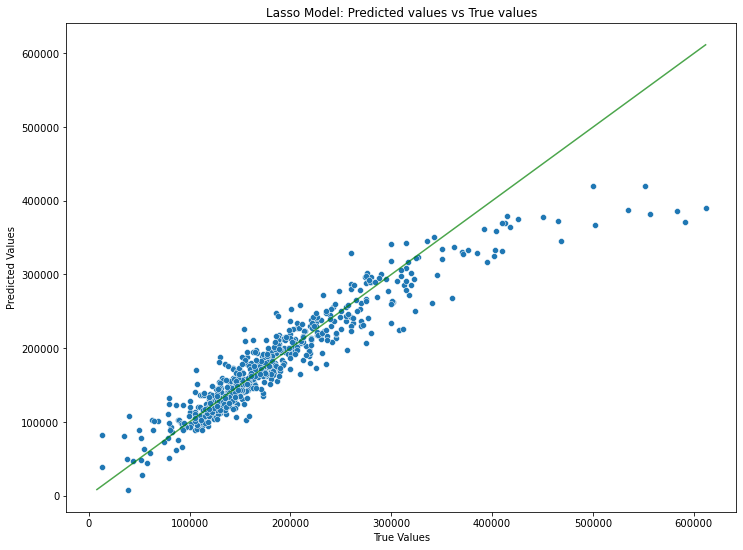

In [6]:
# data frame of our features
X = train.drop(columns='saleprice', axis=1)
y = train['saleprice']

# Split our data to train/test
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale our features
X_train_sc = sc.fit_transform(X_train)
X_holdout_sc = sc.transform(X_holdout)


#Instantiate LassoCV
lasso_cv = LassoCV(
    n_alphas=50,
    cv=3)

mse_lasso_cv = cross_val_score(
    lasso_cv, 
    X_train_sc, 
    y_train, 
    scoring = 'neg_mean_squared_error',
    cv=3
).mean()


# Fit the Model
lasso_cv.fit(X_train_sc, y_train)

# Observe the model intercept
print(f'y-intercept of lasso model: {lasso_cv.intercept_}')
print(f'alpha of lasso model: {lasso_cv.alpha_}')


# Make predictions
y_pred = lasso_cv.predict(X_holdout_sc)
print(f'Train score of lasso model: {lasso_cv.score(X_train_sc, y_train)}')
print(f'Holdout score of lasso model: {lasso_cv.score(X_holdout_sc, y_holdout)}')

# Find the RMSE for lasso
rmse_lasso_cv = (abs(mse_lasso_cv)**0.5)
rmse_lasso_train = mean_squared_error(y_train, lasso_cv.predict(X_train_sc)) ** 0.5
rmse_lasso_holdout = mean_squared_error(y_holdout, y_pred) ** 0.5
print(f'CV RMSE of lasso model: {np.round(rmse_lasso_cv,0)}')
print(f'Train RMSE of lasso model:{np.round(rmse_lasso_train)}')
print(f'Holdout RMSE of lasso model:{np.round(rmse_lasso_holdout)}')

# See the relationship between the observed and predicted values
plt.figure(figsize = (12, 9))
sns.scatterplot(x=y_holdout, y=y_pred);
maxDist = max(max(y_pred), max(y_holdout)) 
minDist = min(min(y_pred), min(y_holdout)) 
sns.lineplot(x=(minDist, maxDist), y=(minDist, maxDist), color = 'green', alpha = 0.7) 
plt.title('Lasso Model: Predicted values vs True values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

It can be observed that the model is good at prediciting the house prices when its below $300,000, but not so well when its above. This could be due to not having enough training data for the extreme values.

### Check the coefficients in the Lasso model that have been cancelled out

In [7]:
#Instantiate model with optimal alpha
lasso = Lasso(
    alpha = lasso_cv.alpha_
)

lasso.fit(X_train_sc, y_train)

Lasso(alpha=893.0926589093826)

In [8]:
# Create a dataframe of Lasso coefficients 
lasso_coefs = pd.DataFrame({'feature':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

# Sort dataframe values according to absolute value in descending order
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

# Print out the percentage of variables that were zeroed out by the Lasso model
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[1]))

#Display the coefficients not zeroed-out by the Lasso model
lasso_coefs[lasso_coefs['coef'] != 0]

Percent variables zeroed out: 0.6024096385542169


,feature,coef,abs_coef
14,gr_liv_area,20639.196034,20639.196034
2,overall_qual,14693.848184,14693.848184
61,neighborhood_NridgHt,9684.745155,9684.745155
17,kitchen_qual,7700.046379,7700.046379
22,garage_cars,6881.356825,6881.356825
...,...,...,...
148,garage_type_Basment,-210.675083,210.675083
0,lot_area,153.185106,153.185106
56,neighborhood_Mitchel,103.474101,103.474101
154,misc_feature_NA_,63.685843,63.685843


Out of all the coefficients, there are only 66 that remain. So 60.2% of variables have been zeroed out.

In [9]:
lasso_coefs.loc[:,['feature','coef']].head(10)

,feature,coef
14,gr_liv_area,20639.196034
2,overall_qual,14693.848184
61,neighborhood_NridgHt,9684.745155
17,kitchen_qual,7700.046379
22,garage_cars,6881.356825
8,bsmtfin_type_1,6567.432183
7,bsmt_exposure,6565.684327
60,neighborhood_NoRidge,5448.917720
67,neighborhood_StoneBr,4985.980773
4,exter_qual,4746.722989


### What is the best fitting Elastic Net Regression model?

CV RMSE of ElasticNet model: 30729.0
y-intercept of ElasticNet model: 180897.59944173062
alpha of ElasticNet model: 0.7050000000000002
Train score of ElasticNet model: 0.8757182886711474
Holdout score of ElasticNet model: 0.8727430302515873
Train RMSE of ElasticNet model:27766.0
Holdout RMSE of ElasticNet model:28643.0


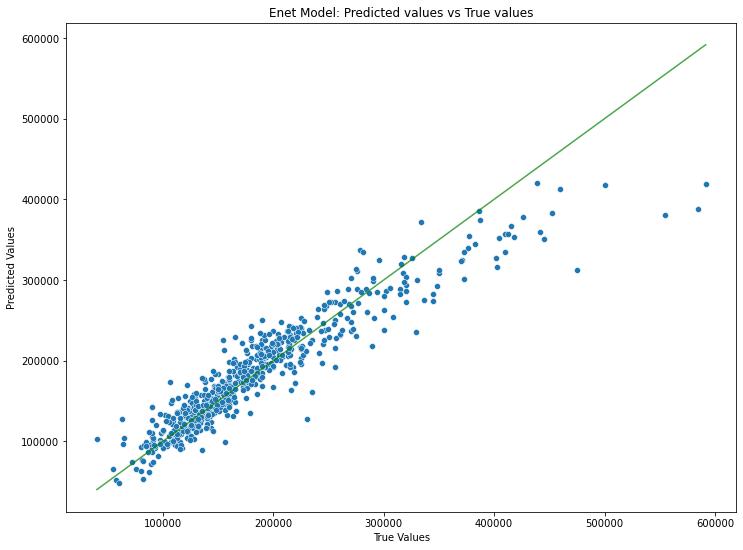

In [10]:
# data frame of our features
X = train.drop(columns='saleprice', axis=1)
y = train['saleprice']

# Split our data to train/test
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale our features
X_train_sc = sc.fit_transform(X_train)
X_holdout_sc = sc.transform(X_holdout)


# Instantiate ElasticNetCV
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet_cv = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Cross Validate the ElasticNet RSME score
mse_enet_cv = cross_val_score(
    enet_cv, 
    X_train_sc, 
    y_train, 
    scoring = 'neg_mean_squared_error',
    cv=3
).mean()

rmse_enet_cv = (abs(mse_enet_cv)**0.5)

# Find the RMSE for Cross-Validation on lasso 
print(f'CV RMSE of ElasticNet model: {np.round(rmse_enet_cv,0)}')

# Fit the Model
enet_cv.fit(X_train_sc, y_train)

# Observe the model intercept
print(f'y-intercept of ElasticNet model: {enet_cv.intercept_}')
print(f'alpha of ElasticNet model: {enet_cv.alpha_}')

# Make predictions
y_pred = enet_cv.predict(X_holdout_sc)
print(f'Train score of ElasticNet model: {enet_cv.score(X_train_sc, y_train)}')
print(f'Holdout score of ElasticNet model: {enet_cv.score(X_holdout_sc, y_holdout)}')

# Find the RMSE for holdout on baseline
rmse_enet_train = mean_squared_error(y_train, enet_cv.predict(X_train_sc)) ** 0.5
rmse_enet_holdout = mean_squared_error(y_holdout, y_pred) ** 0.5
print(f'Train RMSE of ElasticNet model:{np.round(rmse_enet_train)}')
print(f'Holdout RMSE of ElasticNet model:{np.round(rmse_enet_holdout)}')

# See the relationship between the observed and predicted values
plt.figure(figsize = (12, 9))
sns.scatterplot(x=y_holdout, y=y_pred);
maxDist = max(max(y_pred), max(y_holdout)) 
minDist = min(min(y_pred), min(y_holdout)) 
sns.lineplot(x=(minDist, maxDist), y=(minDist, maxDist), color = 'green', alpha = 0.7) 
plt.title('Enet Model: Predicted values vs True values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

## Model Evaluation

|Model|Hyperparams|Num Features|CV RMSE|Train RMSE|Holdout RMSE| 
|:--|:--|:--|:--|:--|:--|
|OLS (1 Feature)|-|1|56568|56210|58465|
|OLS (All Features)|-|199|37304|24079|30629|
|Ridge|Alpha=327|199|31256|26526|30604|
|Lasso|Alpha=893|66|31810|27160|30842|
|ElasticNet|Alpha=0.64 ratio=0.5|77|30729|27766|28643|


To improve on the model performance by lowering the RMSE score, there were multiple iterations of pre-processing and feature selection. Also by increasing the range hyperparameters through crossvalidation. Although the ElasticNet model had a better holdout RMSE score, i decided to go with the lass model as its regularisation resulted in a mode with lesser coefficients and deals with multicollinearity well.